# Classificatori lineari e ada boost

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [210]:
ds_adolscenti = pd.read_csv('../intro/ds_adolescenti.csv',delimiter=';',header=None)
ds_atleti = pd.read_csv('../intro/ds_atleti.csv',delimiter=';',header=None)

In [211]:
ds_adolscenti.head()

,0,1
0,1.621105,54.876104
1,1.764611,62.173090
2,1.755721,55.159962
3,1.660035,56.932057
4,1.726501,46.375012


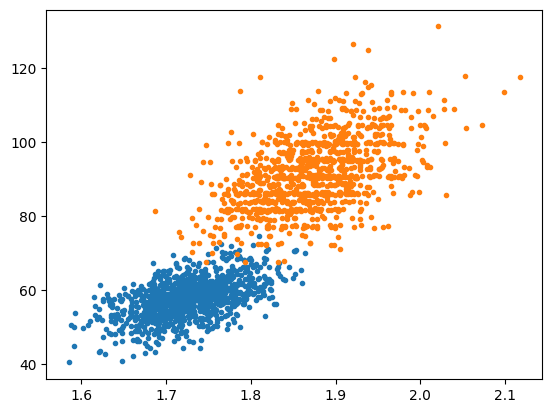

In [212]:
plt.plot(ds_adolscenti[0],ds_adolscenti[1],'.',ds_atleti[0],ds_atleti[1],'.')

In [213]:
i1 = ds_adolscenti[ds_adolscenti[1]<69]
i2 = ds_atleti[ds_atleti[1]>71]

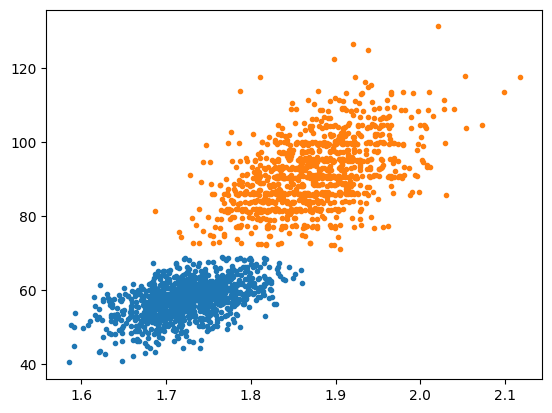

In [214]:
plt.plot(i1[0],i1[1],'.',i2[0],i2[1],'.')

In [215]:
frames = [i1,i2]
ds_tot=pd.concat(frames)

In [216]:
n1 = i1.shape[0]
n2 = i2.shape[0]

In [217]:
import sklearn as sk
import sklearn.preprocessing

ds_tot = sk.preprocessing.minmax_scale(ds_tot)

y = np.block([np.ones(n1),-1*np.ones(n2)])

i = y==1
j = y==-1

def linear_classifier(ds):
    n,d =ds.shape
    ds = sk.preprocessing.add_dummy_feature(ds)
    A = -1*np.array([y]).T * ds
    B = -1*np.ones(n)
    res = scipy.optimize.linprog(np.zeros(d+1),A_ub = A, b_ub = B, bounds = [None,None])
    return res.x

w = linear_classifier(ds_tot)

wp0 = -w[1]/w[2]
wp1 = -w[0]/w[2]

#


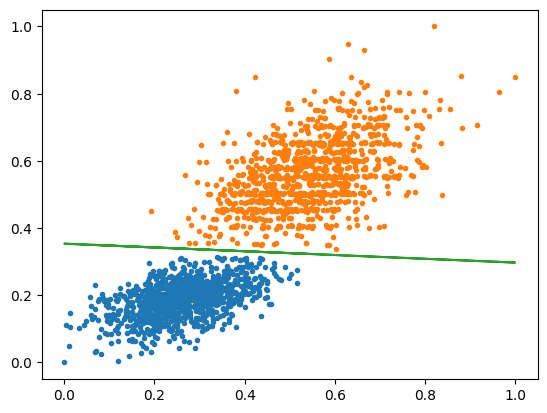

In [222]:
plt.plot(ds_tot[i,0],ds_tot[i,1],'.',ds_tot[j,0],ds_tot[j,1],'.',ds_tot[:,0],wp0*ds_tot[:,0]+wp1,'-')

min $c^Tx$ <br>
$A_{ub} \le b_{ub}$ <br>
$A_{eq}=b_{eq}$ <br> 

Dobbiamo passare c, A e b. Moltiplichiamo tutto per -1 per cambiare il segno della disequazione

$$-A_{ub}x > -b_{ub}$$

n,d=ds.shape

scipy.optimize.linprog(np.zeros(d),A_ub=-1*A,b_ub=-1*np.ones(n))



# ADA boost
da dei weak learner produce una buona soluzione

tutti i classific hanno metodo fit e metodo predict

Il decision stump prova a mettere la soglia per ogni possibile valore (nei valori intermedi e a sinistra/destra dei valori alle estremità)
